In [43]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.constants import R_sun

from funcs.geometry import (create_spherical_grid,
                            rotate_around_arb_axis,
                            calculate_surface_element_velocities,
                            set_up_oblique_auroral_ring,
                            )

# set dark background
plt.style.use('dark_background')


In [44]:
THETA, PHI = create_spherical_grid(int(6e4))
# input parameters

# inclination of rotation axis in radians with the right convention
i_rot = np.pi/2 - 90 * np.pi/180

# inclination of magnetic axis in radians relative to rotation axis
i_mag = 90 * np.pi/180

# rotation period in days
P_rot = 0.2

# stellar radius in solar radii
R_star = .2

# upper latitude of ring around magnetic axis in radians
PHI_max = 50 * np.pi/180

# lower latitude of ring around magnetic axis in radians
PHI_min = 40 * np.pi/180

# lower latitude must be smaller than upper latitude
assert PHI_min < PHI_max



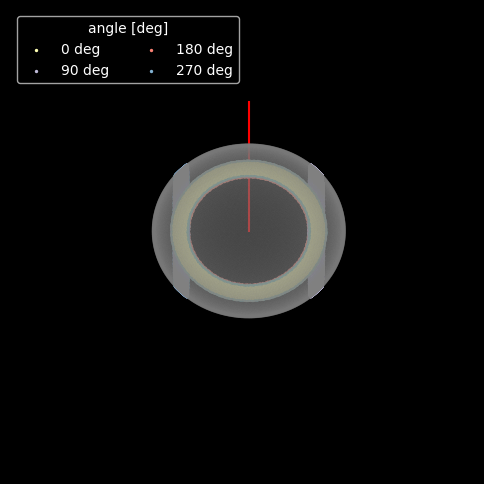

In [51]:
(x, y, z), z_rot, z_rot_mag = set_up_oblique_auroral_ring(THETA, PHI, PHI_max, PHI_min, i_rot, i_mag)


In [ ]:

# plot the points on the sphere but in cartesian coordinates in 3D
fig = plt.figure(figsize=(6,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.sin(THETA)*np.cos(PHI),
              np.sin(THETA)*np.sin(PHI),
              np.cos(THETA),
                    c='grey', s=1, alpha=0.1)

ax.scatter(x, y, z, alpha=1)

# plot the x axis as a dashed line
ax.plot([-1, 1], [0, 0], [0, 0], c='w', ls='--')


# plot z_rot
ax.plot([0, 1.5 *z_rot[0]], [0, 1.5 *z_rot[1]], [0,1.5 * z_rot[2]], c='r')


# plot z_rot_mag
ax.plot([0, z_rot_mag[0]], [0, z_rot_mag[1]], [0, z_rot_mag[2]], c='b')

flux = []
angles = np.array([0, np.pi/2, np.pi, 3*np.pi/2])

# now rotate blue points around the red axis
for angle in angles:
      xr, yr, zr = rotate_around_arb_axis(angle, np.array([x, y, z]), z_rot)

      # plot the rotated blue points
      ax.scatter(xr, yr, zr, alpha=1, s=2, label=f'{angle*180/np.pi:.0f} deg')
      

      # select only the positive values of xr
      q = xr > 0

      # sum over the positive values of xr
      flux.append(np.sum(xr[q]))


# set figure limits to -1.5 to 1.5 on eacha xis
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.3, 1.2)

# label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# rotate the figure such that x-axis point towards me
ax.view_init(0, 0)

# legend
ax.legend(title='angle [deg]', loc='upper left', ncol=2)

# let axes disappear
ax.set_axis_off()

Text(0, 0.5, 'flux from the auroral ring')

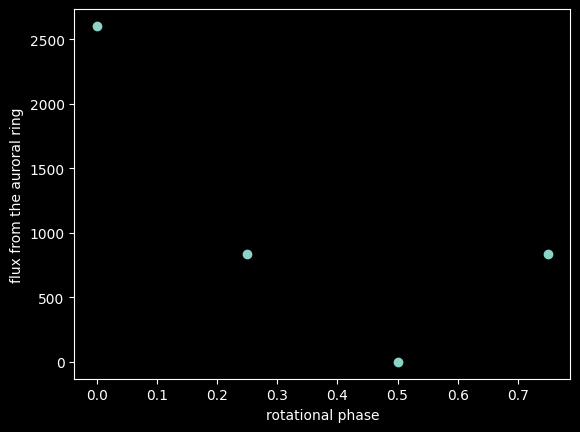

In [52]:
plt.scatter(angles / 2 / np.pi, flux)
plt.xlabel('rotational phase')
plt.ylabel('flux from the auroral ring')

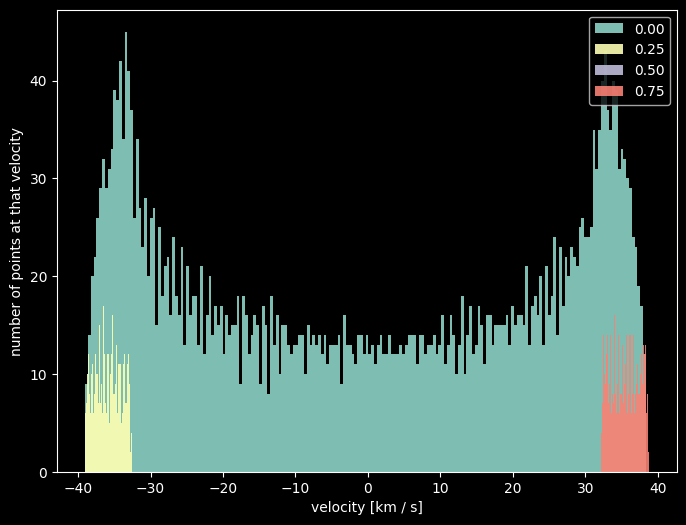

In [61]:
# angular velocity in rad/d
omega = 2 * np.pi / P_rot

# make small angle in rad
dalpha = 1 * np.pi/180

fig, ax = plt.subplots(1, 1, figsize=(8,6))




for alpha in angles:

    dxr_visible = calculate_surface_element_velocities(alpha, dalpha, x, y, z, z_rot, omega, Rstar)

    # make a histogram of the derivative of xr
    ax.hist(dxr_visible, bins=200, density=False, alpha=.9,
            histtype="stepfilled",  label=f"{alpha/2/np.pi:.2f}");


ax.set_xlabel('velocity [km / s]')
ax.set_ylabel('number of points at that velocity')
ax.legend()


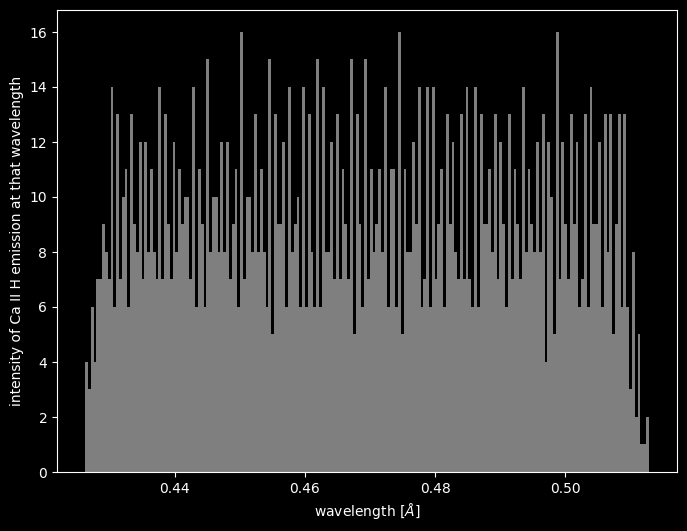

In [62]:
# convert dxr_visible from km/s to nm using speed of light
# and wavelength of the line
c = 299792.458 # km/s
wavelength = 3968.47 # AA Ca II H line

# convert to nm
dxr_visible_nm = dxr_visible * wavelength / c

# plot the histogram
fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.hist(dxr_visible_nm, bins=200, density=False, alpha=0.5,
        histtype="stepfilled", color='w', label=f"{alpha/2/np.pi:.2f}")

ax.set_xlabel(r'wavelength [$\AA$]');
ax.set_ylabel('intensity of Ca II H emission at that wavelength');


### next steps

- select some model spectra of brown dwarfs
- find the locations of where Balmer lines and He I lines are
- rotationally broaden the spectrum
- insert auroral signature (maybe subtract the area from the overall flux? That should give better contrast if the emission is opaque..)


### alt next steps

- look for signatures that look the same
    - what about circles? probably not double horned shape



